Red dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pickle

In [2]:
dffish = pd.read_csv('fish_data.csv')
dffish

,species,length,weight,w_l_ratio
0,Anabas testudineus,10.66,3.45,0.32
1,Anabas testudineus,6.91,3.27,0.47
2,Anabas testudineus,8.38,3.46,0.41
3,Anabas testudineus,7.57,3.36,0.44
4,Anabas testudineus,10.83,3.38,0.31
...,...,...,...,...
4075,Sillaginopsis panijus,30.56,6.12,0.20
4076,Sillaginopsis panijus,29.66,6.11,0.21
4077,Sillaginopsis panijus,32.81,6.25,0.19
4078,Sillaginopsis panijus,29.78,6.11,0.21


In [3]:
dffish.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4080 entries, 0 to 4079
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   species    4080 non-null   object 
 1   length     4080 non-null   float64
 2   weight     4080 non-null   float64
 3   w_l_ratio  4080 non-null   float64
dtypes: float64(3), object(1)
memory usage: 127.6+ KB


In [4]:
dffish.describe()

,length,weight,w_l_ratio
count,4080.000000,4080.000000,4080.000000
mean,17.353544,3.739875,0.252782
std,7.114684,1.040365,0.123046
min,6.360000,2.050000,0.080000
25%,11.327500,3.070000,0.170000
50%,17.350000,3.310000,0.190000
75%,22.585000,4.100000,0.340000
max,33.860000,6.290000,0.640000


In [5]:
pd.unique(dffish['species'])

array(['Anabas testudineus', 'Coilia dussumieri',
       'Otolithoides biauritus', 'Otolithoides pama', 'Pethia conchonius',
       'Polynemus paradiseus', 'Puntius lateristriga', 'Setipinna taty',
       'Sillaginopsis panijus'], dtype=object)

In [6]:
dffish['species'].value_counts()

species
Setipinna taty            480
Anabas testudineus        476
Pethia conchonius         475
Otolithoides biauritus    468
Polynemus paradiseus      458
Sillaginopsis panijus     455
Otolithoides pama         435
Puntius lateristriga      418
Coilia dussumieri         415
Name: count, dtype: int64

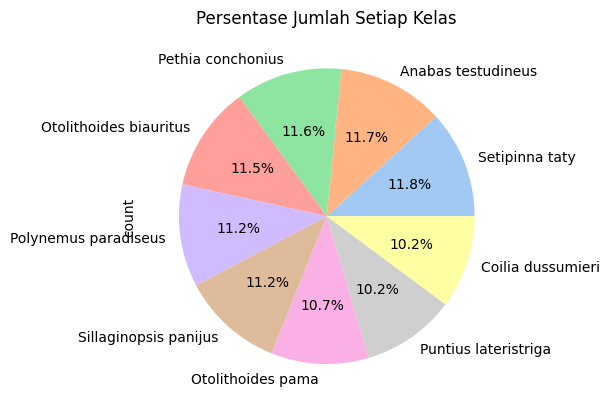

In [7]:
sns.set_palette('pastel')
dffish['species'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Persentase Jumlah Setiap Kelas")
plt.show()

In [8]:
x = dffish.drop(['species'], axis=1)
y = dffish['species']
x

,length,weight,w_l_ratio
0,10.66,3.45,0.32
1,6.91,3.27,0.47
2,8.38,3.46,0.41
3,7.57,3.36,0.44
4,10.83,3.38,0.31
...,...,...,...
4075,30.56,6.12,0.20
4076,29.66,6.11,0.21
4077,32.81,6.25,0.19
4078,29.78,6.11,0.21


In [9]:
y

0          Anabas testudineus
1          Anabas testudineus
2          Anabas testudineus
3          Anabas testudineus
4          Anabas testudineus
                ...          
4075    Sillaginopsis panijus
4076    Sillaginopsis panijus
4077    Sillaginopsis panijus
4078    Sillaginopsis panijus
4079    Sillaginopsis panijus
Name: species, Length: 4080, dtype: object

In [10]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [11]:
svm_model = SVC(kernel='linear', C=1)  # C bisa diubah sesuai kebutuhan
svm_model.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [12]:
# Membuat prediksi dengan data pengujian
y_pred = svm_model.predict(X_test)

# Mengukur akurasi model
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi model SVM dengan kernel linear: {accuracy:.4f}')

Akurasi model SVM dengan kernel linear: 0.9224


In [13]:
# Membuat DataFrame untuk data baru
X_new = pd.DataFrame({
    'length': [200, 150, 180],  # Gantilah dengan data baru Anda
    'weight': [50, 30, 45],     # Gantilah dengan data baru Anda
    'w_l_ratio': [0.25, 0.2, 0.25]  # Gantilah dengan data baru Anda
})

# Melakukan prediksi menggunakan model SVM yang telah dilatih
y_new_pred = svm_model.predict(X_new)

# Menampilkan hasil prediksi
print(f'Prediksi untuk data baru: {y_new_pred}')

Prediksi untuk data baru: ['Sillaginopsis panijus' 'Sillaginopsis panijus' 'Sillaginopsis panijus']


In [14]:
# Menyimpan model yang telah dilatih ke file
with open('model_svm_ikan.pkl', 'wb') as model_file:
   pickle.dump(svm_model, model_file)